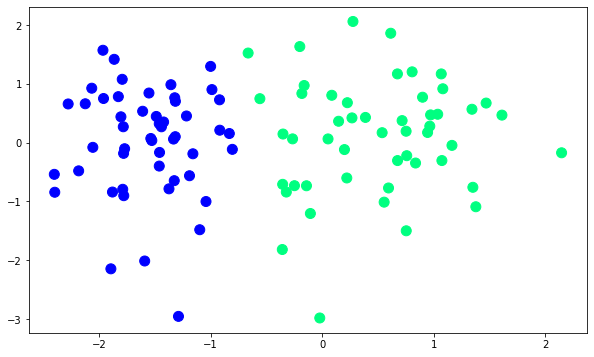

In [39]:
# generate classification data
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

# plot X, y
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=100)

In [40]:
import numpy as np

# define a step function
def step(z):
    return 1 if z > 0 else 0

# define a perceptron
def perceptron(X, y):
    # initialize number of epochs and learning rate
    epochs = 1000
    learning_rate = 0.1
    
    # Add 1 before each entry in X - x0
    X = np.insert(X, 0, 1, axis=1)

    # initialize the weights
    w = np.ones(X.shape[1])

    # Run the weights update algo
    for i in range(epochs):
        # randomly select a row index between 0 and total number of traing data points
        j = np.random.randint(0, X.shape[0])
        # calculate y_hat
        y_hat_j = step(np.dot(X[j], w))
        # update weights
        w = w + learning_rate * (y[j] - y_hat_j) * X[j]

    return (w[0], w[1:])

In [41]:
# Get the intercept and coefficients
intercept, coefficients = perceptron(X, y)
print("Intercept =", intercept)
print("Coefficients =", coefficients)

# get slope and y intercept of the predicted line
m = -1 * coefficients[0] / coefficients[1]
b = -1 * intercept / coefficients[1]
print("m =", m)
print("b =", b)

Intercept = 1.0
Coefficients = [1.3118007  0.08757664]
m = -14.978888204115883
b = -11.418570069933983


(-3.0, 3.0)

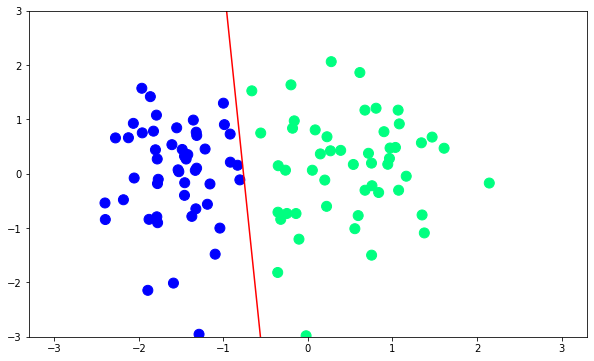

In [42]:
# plot the points and predicted line
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=100)

x_points = np.linspace(-3, 3, 100)
y_points = m * x_points + b
plt.plot(x_points, y_points, color='red')
plt.ylim(-3, 3)